# Group 7  solution

### Members:

Ananya Chandraker

Sethuraman

Suman

## Importing Libraries

In [91]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import plotly.express as px
import warnings

In [51]:
warnings.filterwarnings("ignore")

## Importing dataset from OpenML

In [53]:
#AIDS classification dataset
data = fetch_openml(data_id=46076, as_frame=True)
df = data.frame # Our original dataset stored in a dataframe 'df'

Adding the attribute description here for reference:

time: Time since the baseline measurement, in days.

trt: Treatment code (0, 1, 2), where each number signifies a different treatment regimen.

age: Age of the patient in years.

wtkg: Weight of the patient in kilograms.

hemo: Presence of Hemophilia (0 = No, 1 = Yes).

homo: Homosexual behavior (0 = No, 1 = Yes).

drugs: Drug use (0 = No, 1 = Yes).

karnof: Karnofsky score indicating patient's functional impairment (scores range from 0 to 100).

oprior: Number of opportunistic infections prior to study.

z30: Presence of Z30 gene (0 = No, 1 = Yes).

preanti: Months before receiving antiretroviral therapy.

race: Race (0 = Non-white, 1 = White).

gender: Gender (0 = Female, 1 = Male).

str2: Stratification variable 2.

strat: Overall stratification.

symptom: Presence of specific AIDS-related symptoms (0 = No, 1 = Yes).

treat: Treatment response (0 = No, 1 = Yes).

offtrt: Off treatment (0 = No, 1 = Yes).

cd40: CD4 count at the baseline.

cd420: CD4 count at 20 weeks.

cd80: CD4 count at 8 weeks.

cd820: CD4 count at 20 weeks post the 8-week measurement.

infected: HIV infection status (0 = Negative, 1 = Positive).

## Exploratory Data Analysis

#### Initial analysis

In [57]:
df.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0


In [58]:
df.shape

(50000, 23)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


In [60]:
df.isna().sum().sum()

0

In [77]:
df.dtypes

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

In [79]:
df['infected'].unique()

array([1, 0], dtype=int64)

Here's what we know about the dataset:
1. No missing/NaN values
2. The dataset has 50k rows and 23 columns
3. The dataset has no categorical variables


Our target variable is infected which has two unique values, as describes in the attrib description

### Univariate Analysis

Let's check the distribution of the target variable

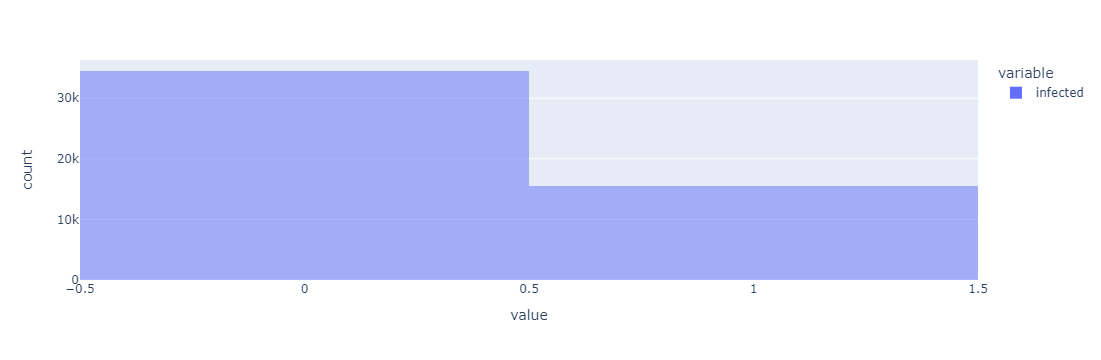

In [105]:
fig = px.histogram(df['infected'],barmode='overlay',nbins=2)
fig.show()